In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
prosper_data = pd.read_csv("./prosperLoanData_clean.csv")

In [4]:
y = prosper_data.BorrowerRate

In [5]:
X = prosper_data.drop(columns = ['BorrowerRate'])

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
model = linear_model.Lasso(alpha=0.5)

In [19]:
model.fit(Xtrain,ytrain)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
ypred = model.predict(Xtest)

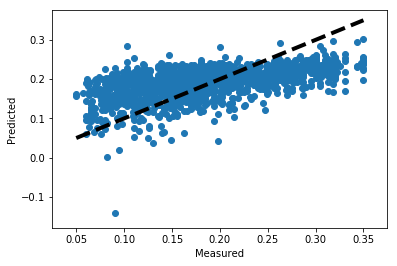

In [21]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [24]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.36 (0.02) MSE
